In [5]:

import autograd.numpy as np
from autograd import grad

x_lin = np.array([1., 2., 2., 3.])
y_lin = np.array([1., 1., 2., 2.])

def feature_map_linear(x):
    # phi_i = x, 1 -> we have a slope (m) and a constant (b)
    return np.vstack([x, np.ones(len(x))]).T

def gradient_descent(X, y, learning_rate=0.1, iters=1000): 
    # X is feature map, y is our target labels
    m, n = X.shape
    w = np.zeros(n) # n weights
    for i in range(iters):
        y_pred = X.dot(w)   
        gradient = X.T.dot(y_pred - y) / m  # find gradient   
        w -= learning_rate * gradient  # update weights
    return w

X_lin = feature_map_linear(x_lin)
w_lin = gradient_descent(X_lin, y_lin, learning_rate=0.1, iters=2000)

print("Linear Function: {:.4f}x + {:.4f}".format(w_lin[0], w_lin[1]))
print("Linear Feature Map:\n", X_lin)
print("Best weights:\n", w_lin)


Linear Function: 0.5000x + 0.5000
Linear Feature Map:
 [[1. 1.]
 [2. 1.]
 [2. 1.]
 [3. 1.]]
Best weights:
 [0.5 0.5]


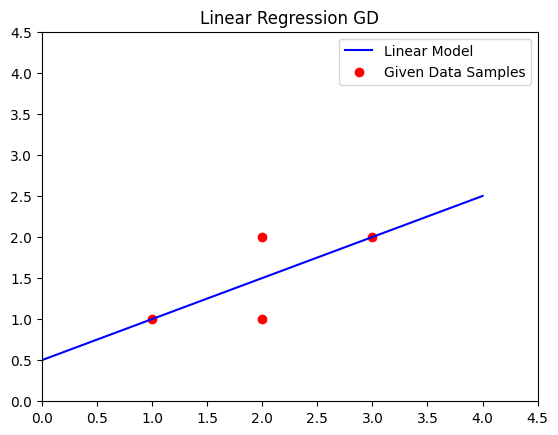

In [2]:
import matplotlib.pyplot as plt
x = np.linspace(0, 4, 100)
y = x * w_lin[0] + w_lin[1]

plt.plot(x, y, label='Linear Model', color='blue')
plt.axis([0.0, 4.5, 0.0, 4.5])
plt.scatter(x_lin, y_lin, color="red", label="Given Data Samples")
plt.title("Linear Regression GD")
plt.legend()
plt.show()

In [18]:
import autograd.numpy as np
from autograd import grad

x_quad = np.array([1., 2., 1.5, 3.])
y_quad = np.array([1., 1., 0., 2.])
def feature_map_quadratic(x):
    # phi_i = x**2, x, 1 -> we have 3 weights
    return np.vstack([x**2, x, np.ones(len(x))]).T

def gradient_descent(X, y, learning_rate=0.1, iters=1000): 
    # X is feat map, y is our target labels
    m, n = X.shape
    w = np.zeros(n) # n weights
    for i in range(iters):
        y_pred = X.dot(w)   
        gradient = X.T.dot(y_pred - y) / m  # find gradient   
        w -= learning_rate * gradient  # update weights
    return w

print("Quadratic: ")
X_quad = feature_map_quadratic(x_quad)
print(f"quadratic feature map: \n {X_quad}")
w_quad = gradient_descent(X_quad, y_quad, learning_rate=0.02, iters=20000)
print(f"w_quad: \n {w_quad}")
print("Quadratic Function = ", w_quad[0], "x^2 + ", w_quad[1], "x + ", w_quad[2])


Quadratic: 
quadratic feature map: 
 [[1.   1.   1.  ]
 [4.   2.   1.  ]
 [2.25 1.5  1.  ]
 [9.   3.   1.  ]]
w_quad: 
 [ 0.76233325 -2.41088441  2.42210606]
Quadratic Function =  0.7623332486891315 x^2 +  -2.410884412897213 x +  2.422106060941752


Best w = 
 [[ 0.20442337]
 [-0.07507173]
 [ 0.29942367]]
Predictions: 
 [[0.42877531]
 [0.96697369]
 [0.64676865]
 [1.91401882]]
[[ 0.20442337]
 [-0.07507173]
 [ 0.29942367]]


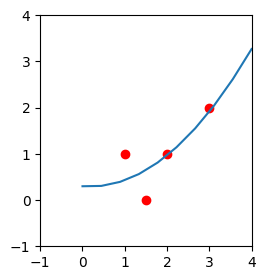

In [4]:
import numpy as np
from numpy import ones
from numpy import array
import matplotlib.pyplot as plt
from numpy import mean

Φ = array([	[1, 1,1],
			[4, 2,1],
			[2.25, 1.5,1],
			[9, 3,1]])


n = Φ.shape[0]
d = Φ.shape[1]

y = array([	[1],
			[1],
			[0],
			[2]])

w = array([[1],[1],[1]]) 
η = 0.01

def f(w):
	ε = Φ.dot(w) - y	# error for each sample
	mse = (1/n)*ε.T.dot(ε)	# average error squared
	return mse.item()		# make sure it is scalar


def fᑊ(w):
	ᐁf = np.zeros((d,1))
	for Φᵢ, yᵢ in zip(Φ,y):
		Φᵢ = np.reshape(Φᵢ, (d,1))
		ᐁf += (w.T.dot(Φᵢ) - yᵢ)*Φᵢ
	return (2/n)*ᐁf

f_value_list = []
for i in range(400):
	w = w - η*fᑊ(w)				# gradient descent update w
	f_value_list.append(f(w))
	
print('Best w = \n', w)